<a href="https://colab.research.google.com/github/Pranavbhatt09/Movie-Review_Sentimental-Analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Import the necessary libraries
import pandas as pd                                   # For data manipulation and analysis

import matplotlib.pyplot as plt                       # For creating visualizations
import seaborn as sns                                 # For creating advanced visualizations
import plotly.express as px                           # For interactive visualizations
from matplotlib import style                          # For customizing matplotlib style

style.use('ggplot')                                   # Set the style to 'ggplot'
import re                                             # For performing regular expression operations
from nltk.tokenize import word_tokenize               # For tokenizing the text
from nltk.stem import PorterStemmer                    # For stemming words

from nltk.corpus import stopwords                     # For removing stopwords from text
stop_words = set(stopwords.words('english'))          # Set English stopwords
from wordcloud import WordCloud                       # For creating word cloud visualizations
from sklearn.feature_extraction.text import TfidfVectorizer # For converting text into numerical features

from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

In [ ]:
# Import the necessary libraries for machine learning and model evaluation
from sklearn.linear_model import LogisticRegression      # For logistic regression classifier
from sklearn.naive_bayes import MultinomialNB             # For multinomial naive Bayes classifier
from sklearn.svm import LinearSVC                         # For linear support vector classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # For model evaluation metrics

import warnings                                           # For ignoring warnings
warnings.filterwarnings('ignore')                         # Filter out warning

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the DataFrame
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

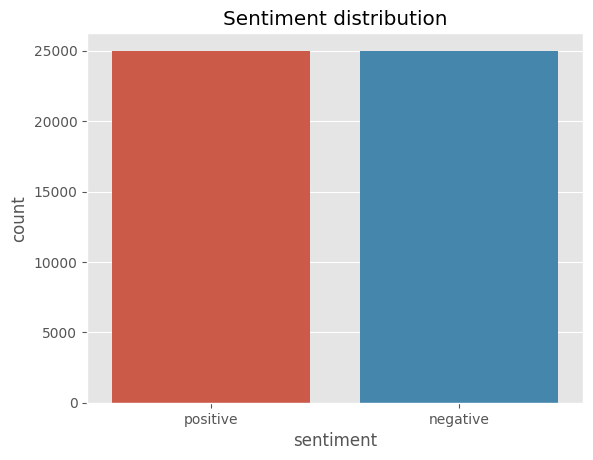

In [ ]:
# Create a count plot using seaborn
sns.countplot(x='sentiment', data=df)

# Set the title of the plot
plt.title("Sentiment distribution")

In [ ]:
# Iterate over the range of 0 to 4
for i in range(5):
    # Print the review number
    print("Review: ", [i])
    # Print the review text
    print(df['review'].iloc[i], "\n")
    # Print the sentiment
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [ ]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


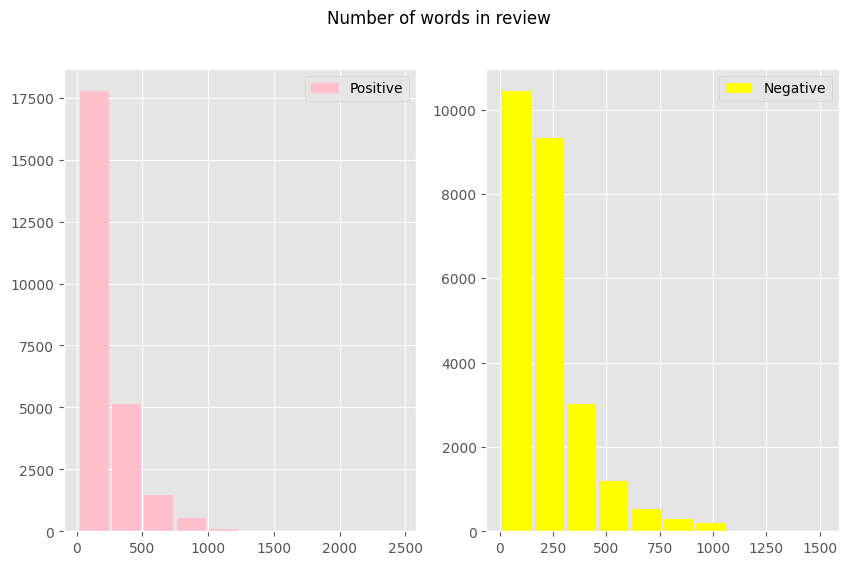

In [ ]:
# Create a figure with a grid of 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='pink', rwidth=0.9)
# Add legend to the first histogram
ax[0].legend(loc='upper right')
# Create a histogram for negative sentiment word count
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='yellow', rwidth=0.9)
# Add legend to the second histogram
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
def data_processing(text):
    text = text.lower()                                  # Convert the text to lowercase
    text = re.sub('<br />', '', text)                     # Remove HTML tags
    text = re.sub(r"https\S+|www\S+|http\S+", '', text)   # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)                   # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                   # Remove special characters
    text_tokens = word_tokenize(text)                     # Tokenize the text into individual words
    filtered_text = [w for w in text_tokens if not w in stop_words]  # Remove stop words
    return " ".join(filtered_text)                         # Join the filtered words back into a string




In [ ]:
df.review = df['review'].apply(data_processing)

In [ ]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [ ]:
df = df.drop_duplicates('review')

stemmer = PorterStemmer()   # Create an instance of the PorterStemmer

def stemming(data):
    text = [stemmer.stem(word) for word in data]   # Perform stemming on each word in the data list
    return data    # Return the stemmed data (which seems to be incorrect, it should be 'return text' instead of 'return data')


In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [ ]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [ ]:
pos_reviews = df[df.sentiment == 1]   # Filter rows where sentiment column is equal to 1 (positive sentiment)
pos_reviews.head()                    # Retrieve the first few rows of the filtered DataFrame

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


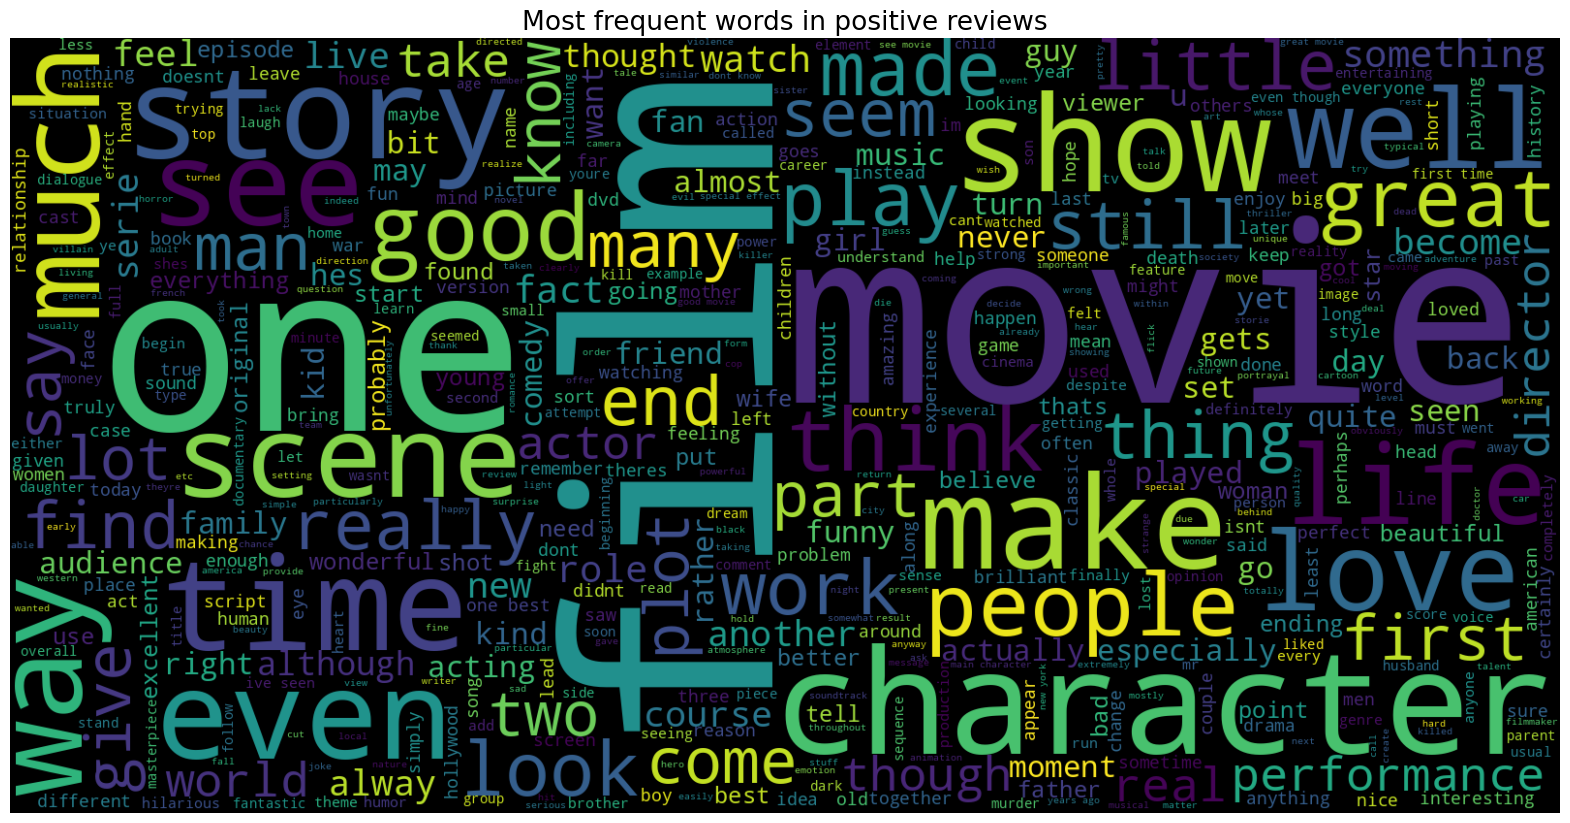

In [ ]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
from collections import Counter

count = Counter()  # Create an empty Counter object

# Iterate over each text in the 'review' column of the positive reviews DataFrame
for text in pos_reviews['review'].values:
    # Split the text into individual words and iterate over each word
    for word in text.split():
        count[word] += 1  # Increment the count for each word in the Counter object

# Retrieve the most common 15 words and their frequencies from the Counter object
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [ ]:
# Creating a bar chart using plotly.express
fig = px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')
fig.show()

In [ ]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


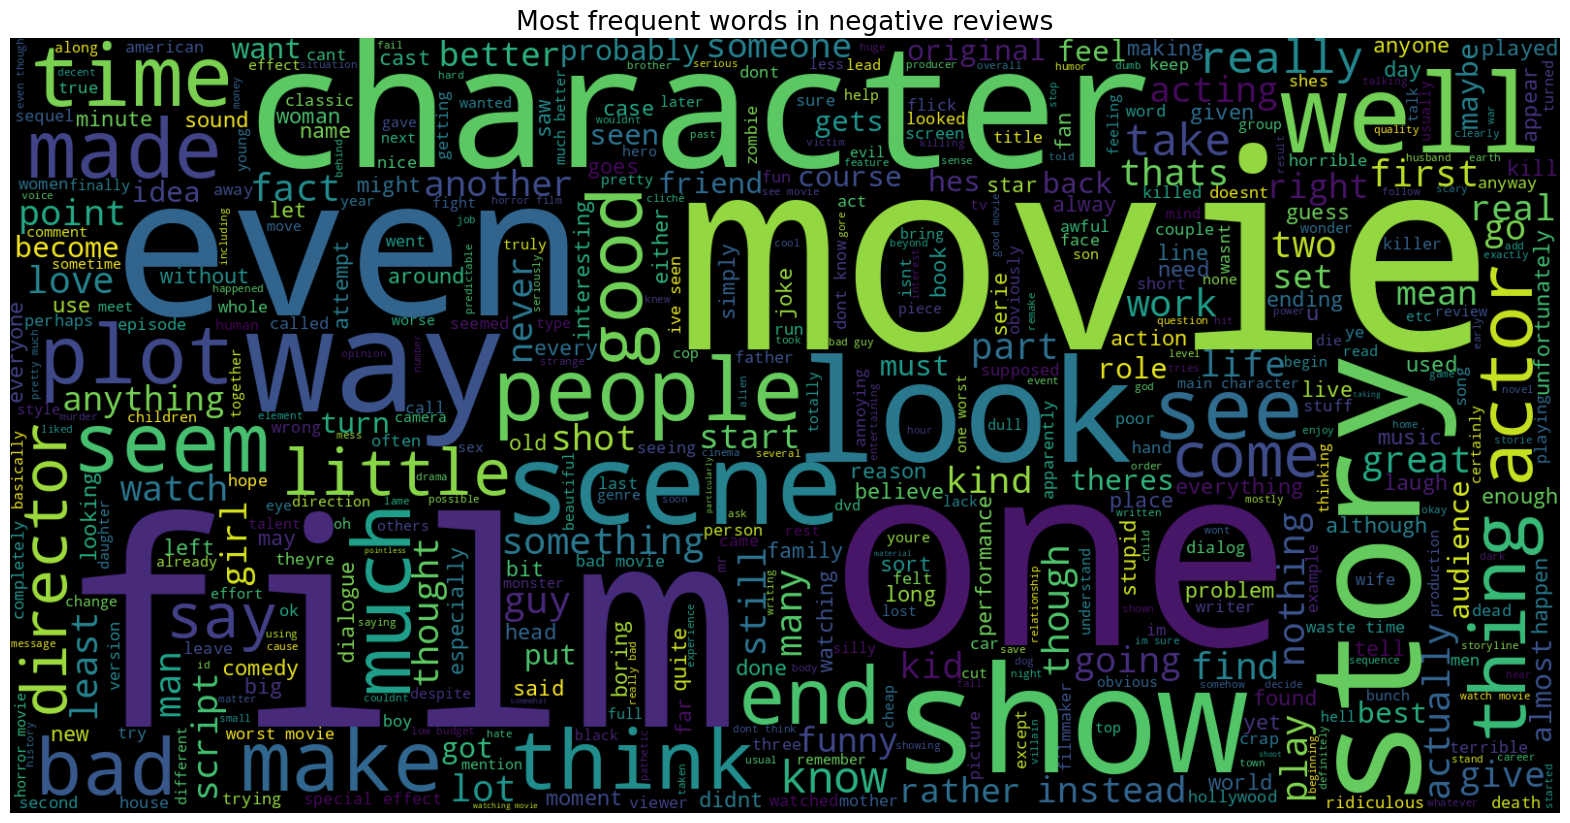

In [ ]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [ ]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [ ]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [ ]:
# Extracting the feature variable and target variable from the DataFrame
X = df['review']  # Feature variable
Y = df['sentiment']  # Target variable

# Creating an instance of TfidfVectorizer
vect = TfidfVectorizer()

# Transforming the feature variable using TfidfVectorizer
X = vect.fit_transform(df['review'])

In [ ]:
# Splitting the dataset into training and testing sets
# X and Y are the input features and target variable respectively

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [ ]:
# Creating an instance of LogisticRegression
logreg = LogisticRegression()

# Training the logistic regression model
logreg.fit(x_train, y_train)

# Making predictions on the test set
logreg_pred = logreg.predict(x_test)

# Calculating the accuracy of the predictions
logreg_acc = accuracy_score(logreg_pred, y_test)

# Printing the test accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.00%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
# Creating an instance of MultinomialNB
mnb = MultinomialNB()

# Training the Multinomial Naive Bayes model
mnb.fit(x_train, y_train)

# Making predictions on the test set
mnb_pred = mnb.predict(x_test)

# Calculating the accuracy of the predictions
mnb_acc = accuracy_score(mnb_pred, y_test)

# Printing the test accuracy
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [ ]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge']}

# Create an instance of GridSearchCV
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)

# Perform grid search to find the best hyperparameters
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.4s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.885 total time=   0.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.4s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.4s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.886 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.901 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.886 total time=   1.9s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(C=1, loss='hinge'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'squared_hinge'}


In [ ]:
# Creating an instance of LinearSVC with specified hyperparameters
svc = LinearSVC(C=1, loss='hinge')

# Training the Linear SVM model
svc.fit(x_train, y_train)

# Making predictions on the test set
svc_pred = svc.predict(x_test)

# Calculating the accuracy of the predictions
svc_acc = accuracy_score(svc_pred, y_test)

# Printing the test accuracy
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 90.14%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

